## 数组对象的方法
### 获取描述统计信息
描述统计信息主要包括数据的集中趋势、离散程度和频数分析等，其中集中趋势主要看均值和中位数，离散程度可以看极值、方差、标准差等，详细的内容大家可以阅读[《统计思维系列课程01：解读数据》](https://zhuanlan.zhihu.com/p/595273755)。

In [5]:
import numpy as np
import matplotlib.pyplot as plt

array1 = np.random.randint(1, 100, 10)
print(array1)

[98  1 40 54 72 63 15 36 53 19]


**计算总和、均值和中位数。**

In [6]:
print(np.sort(array1))
print("总和:", array1.sum())  # 普通的方法计算总和
print("用numpy的方式求总和: ", np.sum(array1))  # 用numpy的方式计算总和
print(
    "平均值", array1.mean()
)  # numpy计算算术平均值，只适用于NumPy数组，是numpy数组对象的实例方法，通常稍快一些，因为直接在数组对象上调用
print(
    "用numpy模块的方式计算平均值: ", np.mean(array1)
)  # 调用NumPy模块的函数来计算平均值，需要额外的函数调用开销，所以慢于上面的mean
print("numpy计算中位数: ", np.median(array1))  # numpy计算中位数
print("numpy计算分位数: ", np.quantile(array1, 0.2))  # numpy计算分位数

[ 1 15 19 36 40 53 54 63 72 98]
总和: 451
用numpy的方式求总和:  451
平均值 45.1
用numpy模块的方式计算平均值:  45.1
numpy计算中位数:  46.5
numpy计算分位数:  18.2


**说明**：
- 上面代码中的`mean`、`median`和`quantile`分别是 NumPy 中计算算术平均值、中位数和分位数的函数，其中`quantitle`函数的第二个参数设置为0.5表示计算50%分位数，也就是中位数。
- 分位数的概念
    分位数（Quantile） 是将数据从小到大排序后，按比例分割的数值：
    - 0.5 分位数 = 中位数（50% 的数据小于等于这个值）
    - 0.25 分位数 = 第一四分位数（25% 的数据小于等于这个值）
    - 0.75 分位数 = 第三四分位数（75% 的数据小于等于这个值）

    **分位数的实际意义**

    分位数帮助我们理解数据的分布情况：
    1. 描述数据位置
        - 告诉你某个值在整个数据集中的相对位置
        - 例如：你的考试成绩在0.8分位数，意味着你超过了80%的同学
    2. 数据分析
        - 快速了解数据的集中程度和偏斜情况
        - 比单纯的均值提供更丰富的信息
    
    **分位数的计算过程**
    
    计算过程：假设数组是：[13 14 23 39 41 49 54 56 96 97]
    1. 确定位置：0.2分位数在排序数组中的位置 = `(10-1) × 0.2 = 1.8`
    2. 线性插值：
        - 位置1.8在索引1和索引2之间
        - 索引1的值：14
        - 索引2的值：23
    3. 插值计算：
        - 小数部分0.8表示在14和23之间80%的位置
        - 结果 = `14 + 0.8 × (23 - 14) = 14 + 0.8 × 9 = 14 + 7.2 = 21.2`
    
    所以21.2是通过在数组第2个值(14)和第3个值(23)之间进行线性插值得到的。

**极值、全距和四分位距离。**

In [3]:
print("最大值: ", array1.max())
print("最大值: ", np.amax(array1))  # amax是numpy.max的别名，都是求最大值
print("最小值: ", array1.min())
print("最小值: ", np.amin(array1))
print("全距: ", np.ptp(array1))
q1, q3 = np.quantile(array1, [0.25, 0.75])
print("四分位距离: ", q3 - q1)

最大值:  95
最大值:  95
最小值:  1
最小值:  1
全距:  94
四分位距离:  61.0


假设数组是[ 5 18 27 36 39 55 61 66 78 83]
1. ptp是什么？有什么用？
`np.ptp()` 是 **Peak to Peak** 的缩写，表示**全距**（极差）。
- 作用：计算数组中最大值与最小值的差值
- 公式：ptp = max - min
- 用途：衡量数据的离散程度，值越大说明数据分布越分散

对于数组 `[5 18 27 36 39 55 61 66 78 83]`：
- 最大值：83
- 最小值：5
- 全距：`83 - 5 = 78`

2. 四分位距离是什么？为什么要求它？

四分位距离（IQR, Interquartile Range） = `Q3 - Q1`

对于数组 [5 18 27 36 39 55 61 66 78 83]：
- Q1（25%分位数）：27 + 0.25×(36-27) = 29.25
- Q3（75%分位数）：66 + 0.25×(78-66) = 69
- 四分位距离：69 - 29.25 = 39.75

为什么要求四分位距离？
- 更稳健的离散度指标：不受极端值影响，比全距更可靠
- 异常值检测：通常用 Q1 - 1.5×IQR 和 Q3 + 1.5×IQR 作为异常值边界
- 数据分布描述：描述中间50%数据的分散程度，更能反映数据的真实分布特征

四分位距离比全距更适合描述大多数数据的分布情况。

### 方差、标准差和变异系数。

In [4]:
print(array1.var())
print(np.var(array1))
print(array1.std())
print(np.std(array1))
print(array1.std() / array1.mean())

1140.69
1140.69
33.77410250472986
33.77410250472986
0.6129601180531735


1. 方差 (Variance)

   `array1.std()  # 或 np.std(array1)`

- 含义：衡量数据偏离均值的平均程度
- 公式：各数据点与均值差值的平方和的平均值
- 意义：数值越大，数据越分散；数值越小，数据越集中

2. 标准差 (Standard Deviation)

`array1.std()  # 或 np.std(array1)`

- 含义：方差的平方根，与原数据同单位
- 意义：更直观地表示数据的离散程度，是最常用的离散度指标

3. 变异系数 (Coefficient of Variation)

`array1.std() / array1.mean()`

- 含义：标准差与均值的比值，是相对离散度指标
- 意义：消除了量纲影响，可以比较不同单位或不同量级数据的离散程度
- 应用：当需要比较两组数据的相对变异程度时特别有用

**为什么需要这三个指标？**

- 方差：理论基础，但单位是原数据的平方
- 标准差：实用性强，单位与原数据一致
- 变异系数：标准化指标，便于横向比较

### 绘制箱线图
箱线图又称为盒须图，是显示一组数据分散情况的统计图，因形状如箱子而得名。 它主要用于反映原始数据分布的特征，还可以进行多组数据分布特征的比较。
- 盒子部分：表示数据的四分位数范围（Q1到Q3），像一个矩形盒子
- 须部分：从盒子两端延伸出去的线段，像盒子长出的"胡须"，表示数据的最小值和最大值范围

为什么叫"须"？
- 因为那两条延伸线看起来像动物的胡须一样从盒子两端伸出来
- 英文叫"Box-and-Whisker Plot"，whisker就是胡须的意思

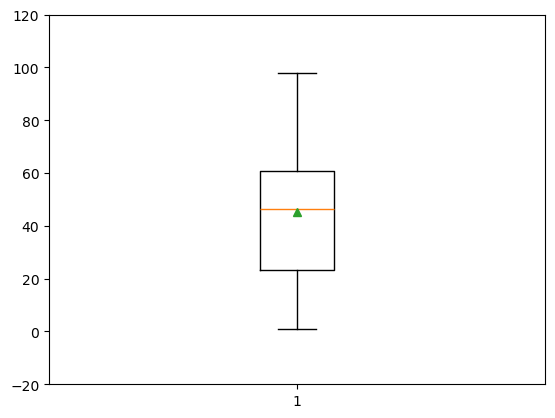

In [7]:
plt.boxplot(array1, showmeans=True) # 绘制array1数据的箱线图，showmeans=True参数会在图中显示均值点
plt.ylim([-20, 120]) # 设置y轴显示范围为-20到120
plt.show() # 显示绘制的图形

橙色线代表：中位数，绿色三角形代表均值

中位数是数据排序后的中间值，均值是所有数据的平均值。两者位置不同时说明数据分布不对称。

<img src="./plot.png" alt="plot" width="600px" />

值得注意的是，对于二维或更高维的数组，在获取描述统计信息时，可以通过名为`axis`的参数指定均值、方差等运算是沿着哪一个轴来执行，`axis`参数不同，执行的结果可能是大相径庭的，如下所示。

[[73 80 62]
 [78 68 73]
 [79 84 97]
 [92 64 89]
 [94 76 74]]
78.86666666666666
[83.2 74.4 79. ]
[71.66666667 73.         86.66666667 81.66666667 81.33333333]
97
[94 84 97]
[80 78 97 92 94]


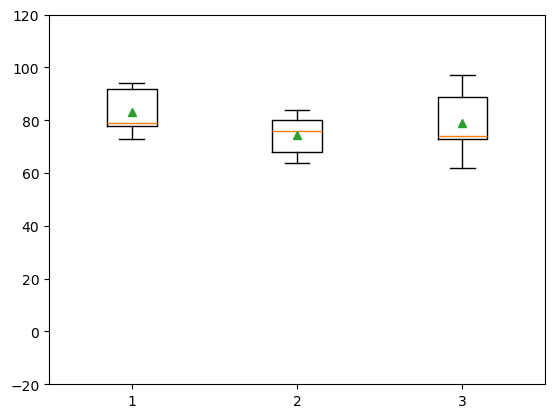

In [18]:
array2 = np.random.randint(60, 101, (5, 3))
"""
如果不写最后一个元组参数：
np.random.randint(60, 101)  # 只生成一个标量值
np.random.randint(60, 101, 10)  # 生成10个元素的一维数组
关键点：第三个参数决定输出形状
不写 → 标量
写整数 → 一维数组
写元组 → 对应维度的数组
"""
print(array2)
print(array2.mean())  # 计算整个数组所有元素的均值（标量值）
print(array2.mean(axis=0))  # 沿着第0轴（行）计算均值，返回每列的均值（1×3数组）
print(
    array2.mean(axis=1)
)  # array2.mean(axis=1) - 沿着第1轴（列）计算均值，返回每行的均值（5×1数组）

# 记忆技巧：axis=0是"压缩行"（多行变成一行），axis=1是"压缩列"（多列变成一列）。

print(array2.max())
print(array2.max(axis=0))
print(array2.max(axis=1))

# 再看看绘制箱线图，对于二维数组每一列都会产生一个统计图形，如下所示。
plt.boxplot(array2, showmeans=True)
plt.ylim([-20, 120])
plt.show()

### 为什么array2.mean(axis=0) - 沿着第0轴（行）计算均值，反而会返回每列的均值呢？
**因为"沿着轴"意味着该轴会被消除。**
- axis=0：沿着行方向计算，行被消除，剩下列 → 得到每列的均值
- axis=1：沿着列方向计算，列被消除，剩下行 → 得到每行的均值

理解要点：axis=0不是"对行操作"，而是"消除行维度"，所以结果是每列的统计值。
axis=0，消除了行维度，想象这个二维数组被纵向挤扁为一行，每行的每个元素就是每列的平均值？如果axis=1，消除了列维度，想象这个二维数组横向被挤扁为一列，这个列的每一个元素是原来每行元素的平均值。

"挤扁"的比喻非常形象，帮助理解axis参数的本质就是`消除指定维度`。
